In [1]:
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ------------------------------------- 949.2/949.2 kB 11.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 13.9 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=dbd35413fb0a366393aeb082a086eb516533cb57744a39cbf87bf545758e1f09
  Stored in directory: c:\users\not-a\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab6

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d') # Gets today's date automatically

data = yf.download(tickers, start=start_date, end=end_date)

print("Successfully downloaded stock data:")
data['Close'].head()

C:\Users\not-a\AppData\Local\Temp\ipykernel_19728\1676486578.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed

Successfully downloaded stock data:


Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2020-01-02,72.538506,94.900497,68.026024,152.791168
2020-01-03,71.833298,93.748497,67.670151,150.888596
2020-01-06,72.405670,95.143997,69.473839,151.278610
2020-01-07,72.065155,95.343002,69.339638,149.899292
2020-01-08,73.224411,94.598503,69.833191,152.286957


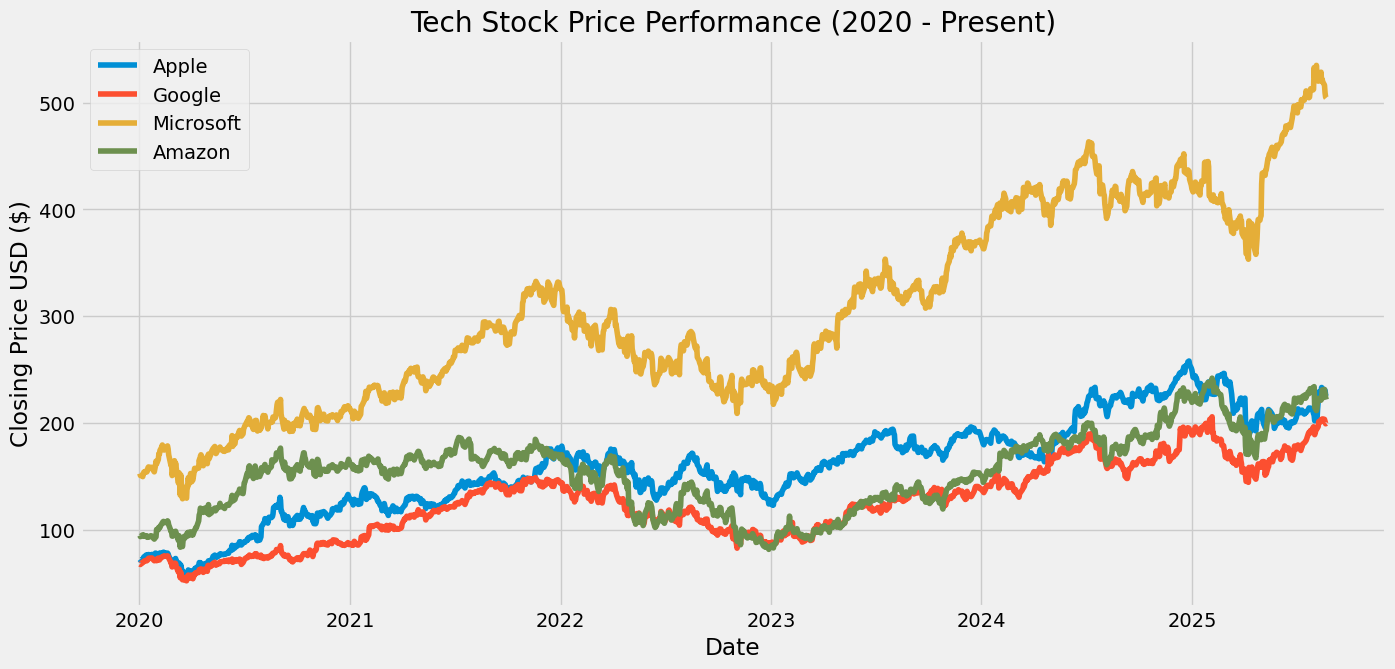

In [3]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15, 7)) 
plt.plot(data['Close']['AAPL'], label='Apple')
plt.plot(data['Close']['GOOGL'], label='Google')
plt.plot(data['Close']['MSFT'], label='Microsoft')
plt.plot(data['Close']['AMZN'], label='Amazon')

plt.title('Tech Stock Price Performance (2020 - Present)')
plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')

plt.legend()

plt.show()

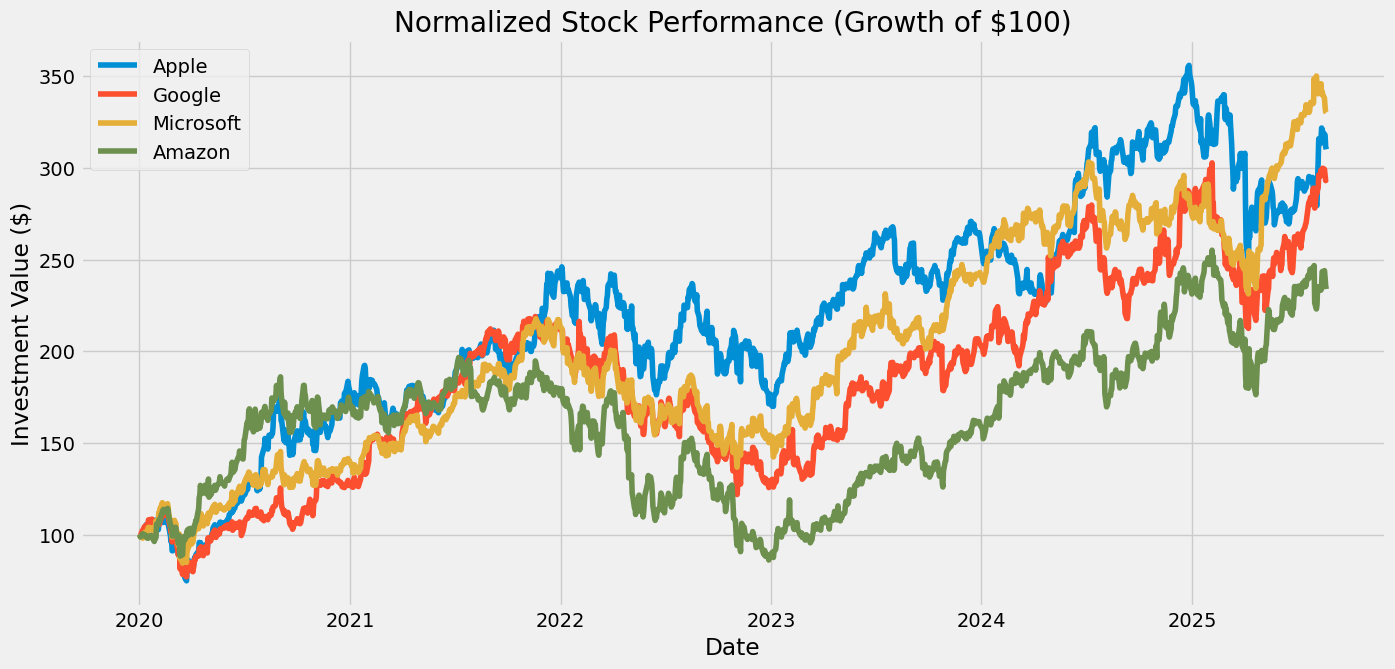

In [4]:
normalized_data = data['Close'].div(data['Close'].iloc[0]) * 100

plt.figure(figsize=(15, 7))

plt.plot(normalized_data['AAPL'], label='Apple')
plt.plot(normalized_data['GOOGL'], label='Google')
plt.plot(normalized_data['MSFT'], label='Microsoft')
plt.plot(normalized_data['AMZN'], label='Amazon')

plt.title('Normalized Stock Performance (Growth of $100)')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()

plt.show()

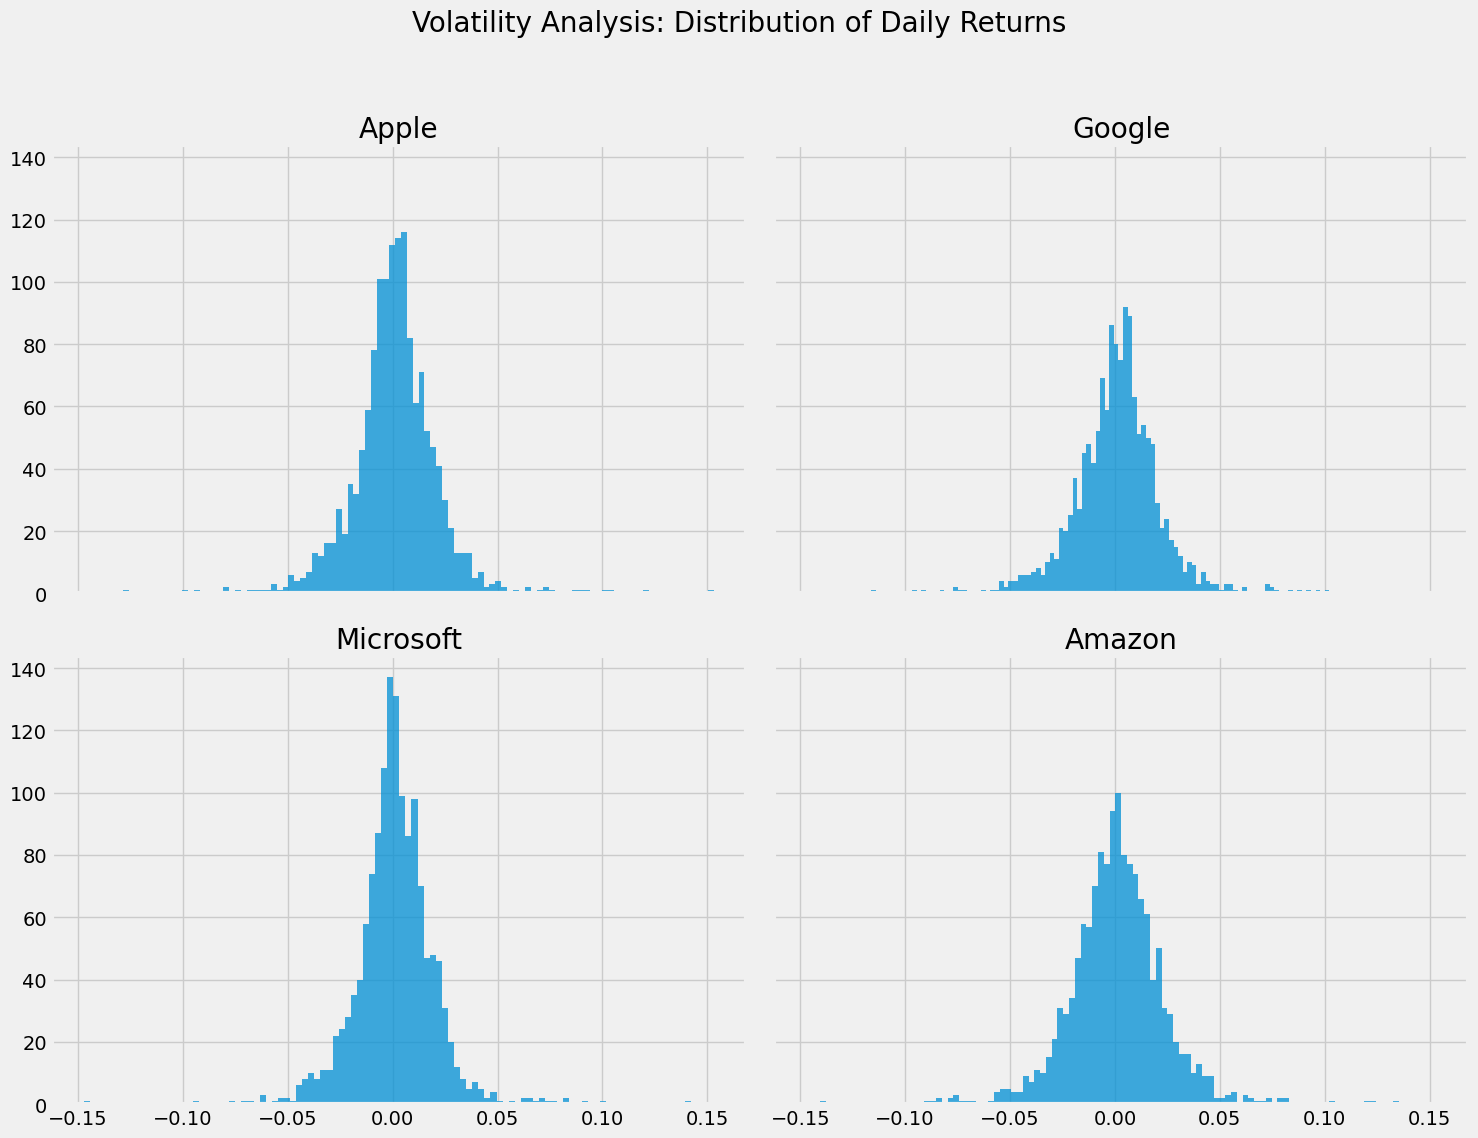

In [5]:
daily_returns = data['Close'].pct_change()

fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
fig.suptitle('Volatility Analysis: Distribution of Daily Returns', fontsize=20)

axes[0, 0].hist(daily_returns['AAPL'].dropna(), bins=100, alpha=0.75)
axes[0, 0].set_title('Apple')

axes[0, 1].hist(daily_returns['GOOGL'].dropna(), bins=100, alpha=0.75)
axes[0, 1].set_title('Google')

axes[1, 0].hist(daily_returns['MSFT'].dropna(), bins=100, alpha=0.75)
axes[1, 0].set_title('Microsoft')

axes[1, 1].hist(daily_returns['AMZN'].dropna(), bins=100, alpha=0.75)
axes[1, 1].set_title('Amazon')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

In [6]:
plt.savefig('performance_chart.png')

<Figure size 640x480 with 0 Axes>

In [7]:
plt.savefig('normalized_chart.png')

<Figure size 640x480 with 0 Axes>

In [8]:
plt.savefig('volatility_chart.png')

<Figure size 640x480 with 0 Axes>